In [1]:
from keras.datasets import mnist 
(train_images, train_lables),(test_images, test_labels)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
len(train_lables)

60000

In [4]:
train_lables

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))


In [9]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
train_images= train_images.reshape((60000,28*28))
train_images= train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

In [11]:
from keras.utils import to_categorical

train_lables =to_categorical(train_lables)
test_labels=to_categorical(test_labels)

In [12]:
network.fit(train_images,train_lables,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2543 - accuracy: 0.9267
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1014 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0664 - accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0484 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0360 - accuracy: 0.9891


In [13]:
test_loss , test_acc = network.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0643 - accuracy: 0.9806


In [14]:
print('test_acc:',test_acc)

test_acc: 0.9805999994277954


In [15]:
import numpy as np


In [16]:
x= np.array(12)

In [17]:
x

array(12)

In [18]:
x.ndim

0

In [19]:
x=np.array([12,3,6,14,7])

In [20]:
x

array([12,  3,  6, 14,  7])

In [21]:
x.ndim

1

In [22]:
x=np.array([[5,78,2,34,0],
            [6,79,3,35,1],
            [7,80,4,36,2]])

In [23]:
x.ndim

2

In [24]:
from keras.datasets import mnist
(train_images, train_lables),(test_images,test_labels) = mnist.load_data()
print(train_images.ndim)


3


In [25]:
print(train_images.dtype)

uint8


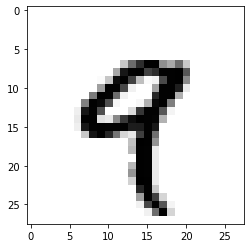

In [26]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [27]:
my_slice =train_images[10:100]

In [28]:
print(my_slice.shape)

(90, 28, 28)


In [29]:
my_slice = train_images[10:100,:,:]
my_slice.shape 

(90, 28, 28)

In [33]:
my_slice =train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

## 배치 데이터
- 
``` python
batch = train_images[128*n:128*(n+1)] 
```
이런식으로 표현됨

In [36]:
batch = train_images[:128]

In [37]:
batch = train_images[128:256]


## 2.3 신경망의 톱니바퀴: 텐서 연산 
- 심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇종류의 텐서 연산으로 나타낼 수 있다. 
- 텐서 덧셈이나 텐서 곱셈 등이 있다.  

- ```python
# dense 층을 쌓아서 신경망을 만듦 
keras.layers.Dense(512,activation='relu')
```
- W는 2D 텐서고, b는 벡터 
```python
output =relu(dot(W,input)+b)
```
-relu(x) = max(x,0)

In [39]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

In [42]:
def naive_add(x,y):
    assert len(x.shape) ==2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x
        

## ReLu 
- 이 함수는 쉽게 말해 0보다 작은 값이 나온 경우 0을 반환하고, 0보다 큰 값이 나온 경우 그 값을 그대로 반환하는 함수다



In [45]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2 #x는 2D 넘파이 배열입니다.
    assert len(y.shape) == 1 #y는 넘파이 벡터입니다.
    assert x.shape[1] == y.shape[0]

    x=x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사합니다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i]
    return x


In [47]:
import numpy as np
x = np.random.random((64,3,32,10)) # x는 (64,3,32,10) 크기의 랜덤 
y = np.random.random((32,10)) # y는 (32,10) 크기의 랜덤 텐서입니다.
z = np.maximum(x,y) # 출력 z 크기는 x와 동일하게 (64,3,32,10)입니다.
print(z)

[[[[0.8148938  0.45650232 0.13595457 ... 0.80931371 0.62074945
    0.95512964]
   [0.97862723 0.45975199 0.8996589  ... 0.82353816 0.33276766
    0.99010607]
   [0.34665038 0.87427208 0.68956995 ... 0.77173632 0.55651028
    0.94759294]
   ...
   [0.50377025 0.64939756 0.73205161 ... 0.56876319 0.82013136
    0.30624525]
   [0.66631226 0.50058521 0.90243856 ... 0.64639433 0.19300771
    0.8861244 ]
   [0.28655842 0.55395804 0.99892601 ... 0.77547497 0.82790175
    0.82334929]]

  [[0.8148938  0.87628341 0.47214069 ... 0.85578376 0.62074945
    0.95512964]
   [0.97862723 0.57361047 0.8996589  ... 0.78855475 0.33276766
    0.31250597]
   [0.89777639 0.87427208 0.68956995 ... 0.73024606 0.59695553
    0.94759294]
   ...
   [0.90751799 0.22527421 0.43538642 ... 0.48473358 0.82013136
    0.02550783]
   [0.66631226 0.8452566  0.81888687 ... 0.64639433 0.49705905
    0.8861244 ]
   [0.28655842 0.55395804 0.52445605 ... 0.77547497 0.82790175
    0.82334929]]

  [[0.8148938  0.99054448 0.085723

In [49]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]

    z=0.
    for i in range(x.shape[0]):
        z += x[i]*y[i]
    return z


In [50]:
import numpy as np
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2 # x는 넘파이 행렬입니다.
    assert len(y.shape) == 1 # y는 넘파이 벡터입니다.
    assert x.shape[1] == y.shape[0] # x의 두 번째 차원이 y의 첫 번째 차원과 같아야 합니다!

    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] *y[j]
    return z 

In [51]:
def naive_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:],y)
    return z

In [52]:
def naive_matrix_dot(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0] 
    z = np.zeros((x.shape[0],y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i,:]
            column_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x,column_y)
    return z